<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4
#### Lugano Damian

## Consigna

<img src="./pics/consignaTS4.png" align="center" width="600" />

1.Obtener la transferencia de máxima planicidad del filtro requerido.

2.Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia. Compare el diagrama de polos y ceros con el del filtro pasabajo prototipo.

3.Implementar el circuito normalizado con estructuras pasivas. (Puede utilizar dispositivos activos para separar secciones).

4.Reemplace los inductores en las estructuras pasivas mediante el GIC de Antoniou, en la configuración que considere más apropiada.

Bonus:

+10 💎 Simulación numérica y circuital.
+10  🍺 Presentación en jupyter notebook

## Resolución 

In [1]:
from IPython.display import IFrame
IFrame("./docs/TS4.pdf", width=950, height=1000)

## Simulación numérica y circuital

### Simulación numérica en python

La simulación numérica se realizó en python y se utilizó el siguiente script para comprobar los calculos realizados:

In [2]:
## Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

In [3]:
##Plantilla del filtro pasa bajos prototipo

#wp=1
ws=4
alfa_max=1
alfa_min=30

#### Transferencia factorizada y parametrizada del Butter de tercer orden

<IPython.core.display.Math object>

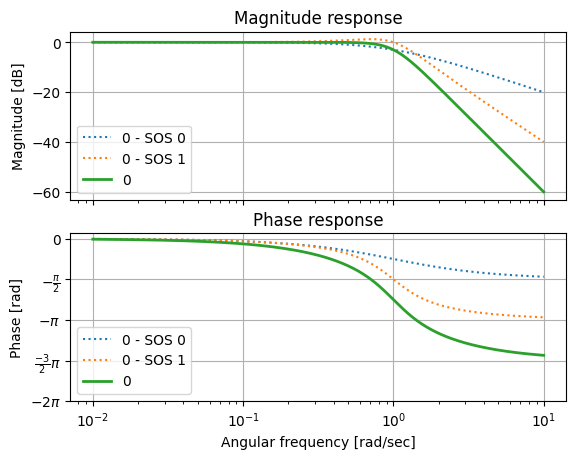

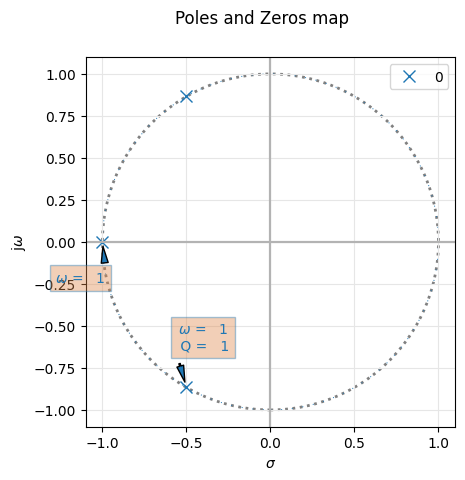

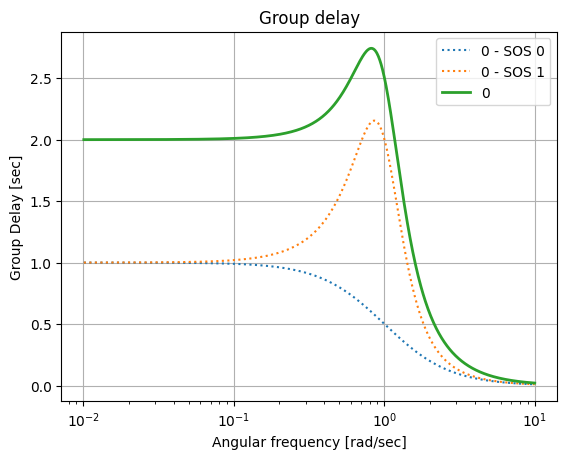

In [4]:

ee = ( np.sqrt( 10**(alfa_max / 10) - 1 ))    #Por lo general w_p=1

order=np.ceil( 0.5 * ( np.log10( ( 10**(alfa_min * 0.1) - 1 ) / ee**2)  / np.log10(ws) ) ) 

z,p,k = sig.buttap (order)
N, D = sig.zpk2tf(z, p, k)

print_subtitle('Transferencia factorizada y parametrizada del Butter de tercer orden')
sos_lp = tf2sos_analog(N, D)
sos_lp[sos_lp < 1e-6] = 0.0
pretty_print_SOS(sos_lp)

analyze_sys(sos_lp)

#### Transferencia factorizada y parametrizada de filtro pasa bajo de máxima planicidad

<IPython.core.display.Math object>

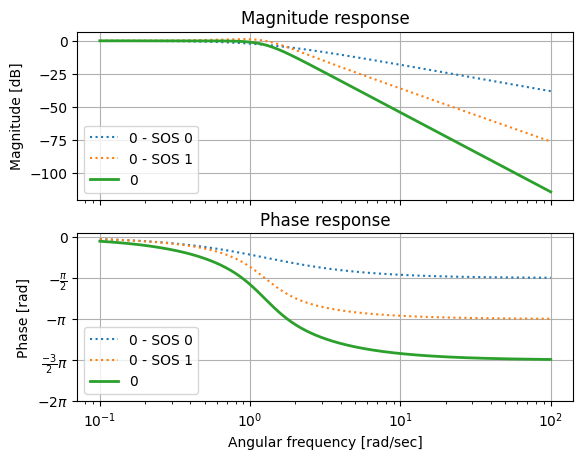

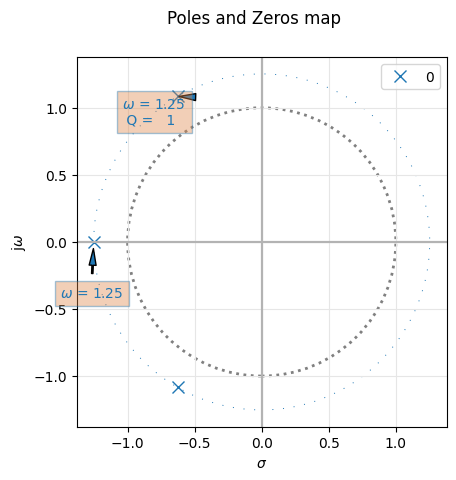

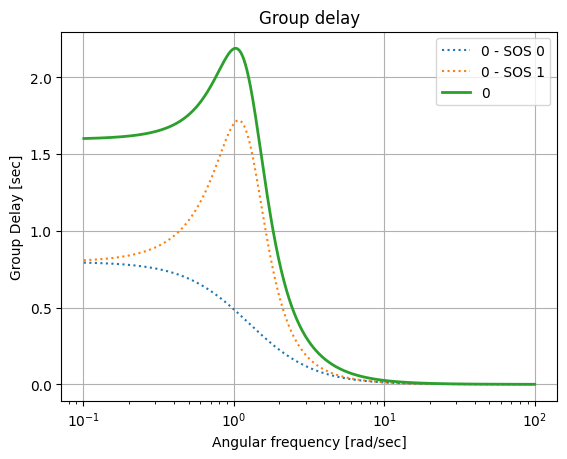

In [5]:
N, D = sig.lp2lp(N, D, ee**(-1/order) ) #Esta funcion cambia el wo del filtro de MP

print_subtitle('Transferencia factorizada y parametrizada de filtro pasa bajo de máxima planicidad')
sos_flp = tf2sos_analog(N, D)
sos_flp[sos_flp < 1e-6] = 0.0
pretty_print_SOS(sos_flp)

analyze_sys(sos_flp)

In [6]:
N,D = sig.lp2hp(N,D)
    
#print_subtitle('Transferencia factorizada y parametrizada de filtro pasa alto de máxima planicidad')
#sos_fhp = tf2sos_analog(N, D)
#sos_fhp[sos_fhp < 1e-6] = 0.0
#pretty_print_SOS(sos_fhp)

### Simulación circuital en LTspice

termine 18.35